<a href="https://colab.research.google.com/github/JorgeAndreu1/EI1028/blob/main/Rastrigin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/RobInLabUJI/Pyevolve

fatal: destination path 'Pyevolve' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('/content/Pyevolve')

In [ ]:
import collections
collections.Callable = collections.abc.Callable

# The Rastrigin function

This notebook is adapted from [a Pyevolve example](http://pyevolve.sourceforge.net/0_6rc1/examples.html#example-7-the-rastrigin-function).

[<img src="https://github.com/RobInLabUJI/GeneticAlgorithm/raw/main/img/Rastrigin_function.png" align="right" width=320>](http://en.wikipedia.org/wiki/Rastrigin_function)

[From Wikipedia, the free encyclopedia](https://en.wikipedia.org/wiki/Rastrigin_function): in mathematical optimization, the Rastrigin function is a non-convex function used as a performance test problem for optimization algorithms. It is a typical example of non-linear multimodal function. It was first proposed by Rastrigin as a 2-dimensional function and has been generalized by Mühlenbein et al. Finding the minimum of this function is a fairly difficult problem due to its large search space and its large number of local minima.

Below is the code to minimize the deceptive [Rastrigin function](http://en.wikipedia.org/wiki/Rastrigin_function) in a 20-dimensional space, i.e. with 20 parameters.

You should add the necessary statements for storing the results in a database named 'rastrigin.db' with identifier 'ex1', which will be used later for checking the evolution.

In [ ]:
from pyevolve import GSimpleGA
from pyevolve import G1DList
from pyevolve import Mutators, Initializators
from pyevolve import Selectors
from pyevolve import Consts
from pyevolve import DBAdapters
from pyevolve import Statistics
import math

In [ ]:
def rastrigin(genome):
    n = len(genome)
    total = 0
    for i in range(n):
        total += genome[i]**2 - 10*math.cos(2*math.pi*genome[i])
    return (10*n) + total

In [ ]:
genome = G1DList.G1DList(20)
genome.setParams(rangemin=-5.2, rangemax=5.3, bestrawscore=0.0, rounddecimal=1)
genome.initializator.set(Initializators.G1DListInitializatorReal)
genome.mutator.set(Mutators.G1DListMutatorRealGaussian)
genome.evaluator.set(rastrigin)

In [ ]:
sqlite_adapter = DBAdapters.DBSQLite(dbname='rastrigin.db', identify='ex1', resetDB=True)

In [ ]:
ga = GSimpleGA.GSimpleGA(genome)
ga.terminationCriteria.set(GSimpleGA.RawScoreCriteria)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setGenerations(500)
ga.setCrossoverRate(0.8)
ga.setPopulationSize(100)
ga.setMutationRate(0.06)
ga.setDBAdapter(sqlite_adapter)

In [ ]:
ga.evolve(freq_stats=50)
best = ga.bestIndividual()
print(best)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [454.88(492.23)/312.75(280.08)/379.07(379.07)]
Gen. 50 (10.00%): Max/Min/Avg Fitness(Raw)             [18.77(30.74)/13.35(4.56)/15.64(15.64)]
Gen. 100 (20.00%): Max/Min/Avg Fitness(Raw)             [13.49(30.77)/9.96(0.14)/11.24(11.24)]
Gen. 150 (30.00%): Max/Min/Avg Fitness(Raw)             [12.65(24.36)/8.94(0.05)/10.55(10.55)]

	Evolution stopped by Termination Criteria function !

Gen. 158 (31.60%): Max/Min/Avg Fitness(Raw)             [13.18(26.33)/9.42(0.05)/10.98(10.98)]
Total time elapsed: 0.535 seconds.
- GenomeBase
	Score:			 0.049015
	Fitness:		 9.417597

	Params:		 {'rangemin': -5.2, 'rangemax': 5.3, 'bestrawscore': 0.0, 'rounddecimal': 1}

	Slot [Evaluator] (Count: 1)
		Name: rastrigin - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: G1DListInitializatorReal - Weight: 0.50
		Doc:  Real initialization function of G1DList

    This initializator accepts the *rangemin* and *rangemax* genome parameters.

    
	Slot [M

In [ ]:
!git clone https://github.com/RobInLabUJI/Pyevolve

fatal: destination path 'Pyevolve' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('/content/Pyevolve')

In [ ]:
!wget https://github.com/RobInLabUJI/GeneticAlgorithm/raw/main/pyevolve_plot.py

--2025-04-25 15:11:24--  https://github.com/RobInLabUJI/GeneticAlgorithm/raw/main/pyevolve_plot.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RobInLabUJI/GeneticAlgorithm/main/pyevolve_plot.py [following]
--2025-04-25 15:11:24--  https://raw.githubusercontent.com/RobInLabUJI/GeneticAlgorithm/main/pyevolve_plot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10520 (10K) [text/plain]
Saving to: ‘pyevolve_plot.py.2’

pyevolve_plot.py.2  100%[===================>]  10.27K  --.-KB/s    in 0.001s  

2025-04-25 15:11:24 (19.8 MB/s) - ‘pyevolve_plot.py.2’ saved [10520/10520]



# The Rastrigin function: plotting results

We are going to make the following plots for the results of the evolution stored in the database:
* Error bars graph (raw scores).
* Error bars graph (fitness scores).
* Max/min/avg/std. dev. graph (raw scores).
* Max/min/avg/std. dev. graph (fitness scores).
* Raw and Fitness min/max difference graph.
* Heat map of population raw score distribution.

You can check now the results by plotting some graphs of the evolution process in [this notebook](https://github.com/RobInLabUJI/GeneticAlgorithm/blob/main/Rastrigin_check.ipynb).

In [ ]:
%matplotlib inline
from pyevolve_plot import plot_errorbars_raw, plot_errorbars_fitness, \
                          plot_maxmin_raw, plot_maxmin_fitness, \
                          plot_diff_raw, plot_pop_heatmap_raw

Loading database...
159 generations found !


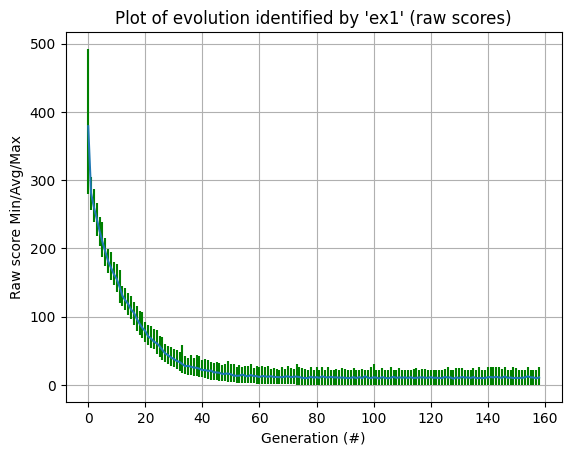

In [ ]:
plot_errorbars_raw('rastrigin.db','ex1')

Loading database...
159 generations found !


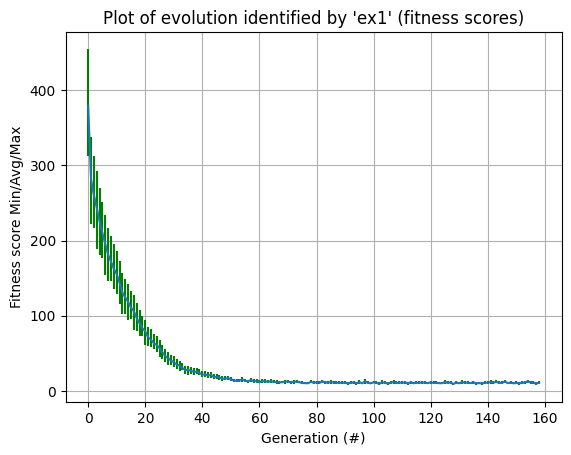

In [ ]:
plot_errorbars_fitness('rastrigin.db','ex1')

Loading database...
159 generations found !


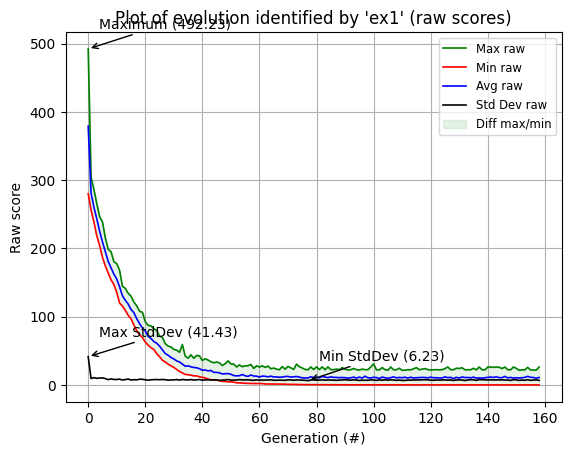

In [ ]:
plot_maxmin_raw('rastrigin.db','ex1')

Loading database...
159 generations found !


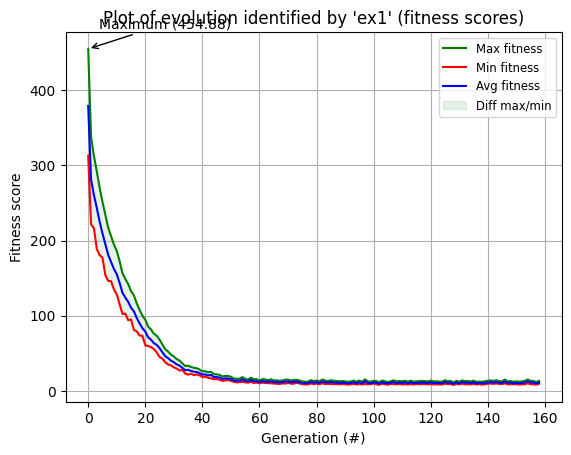

In [ ]:
plot_maxmin_fitness('rastrigin.db','ex1')

Loading database...
159 generations found !


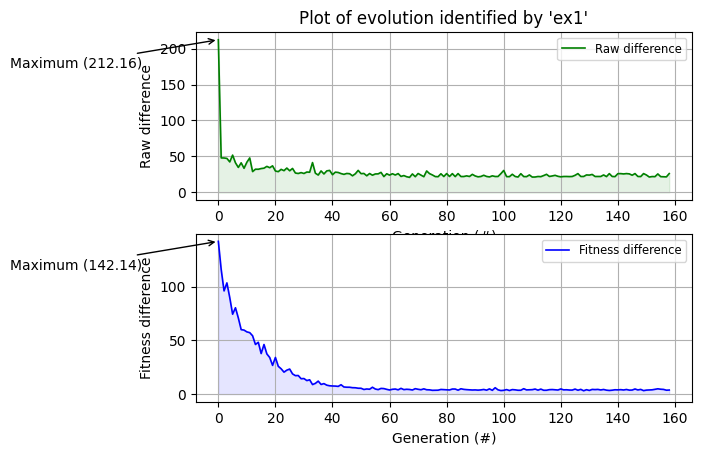

In [ ]:
plot_diff_raw('rastrigin.db','ex1')

Loading database...
159 generations found !


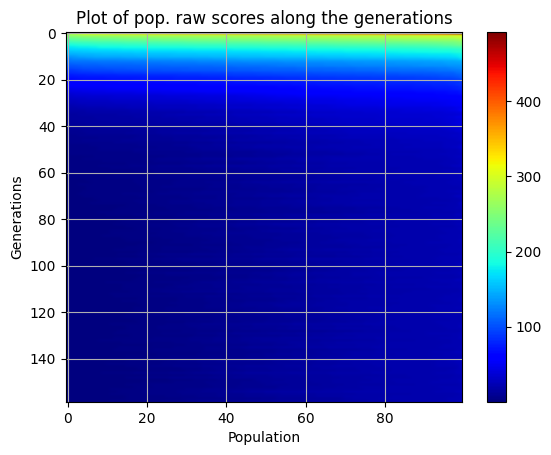

In [ ]:
plot_pop_heatmap_raw('rastrigin.db','ex1')